In [22]:
from functools import reduce
import numpy as np
from pareto_3D import simple_cull, dominates
from adjustText import adjust_text
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (10, 10)
font = {'family': 'serif',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

def has_unique_elements(input_list):
    return len(input_list) == len(set(input_list))

def remove_duplicates(lst):
    unique_set = set()
    unique_list = []
    for inner_list in lst:
        # Convert the inner list to a tuple to make it hashable
        tuple_inner_list = tuple(inner_list)
        if tuple_inner_list not in unique_set:
            unique_list.append(inner_list)
            unique_set.add(tuple_inner_list)
    return unique_list

def mapping2time(input_list, a):
    result_dict = {}
    for i, item in enumerate(input_list):
        if item in result_dict:
            result_dict[item].append(a[i])
        else:
            result_dict[item] = [a[i]]
    return result_dict

# write list to txt
def savelist2txt(l, destfpath):
    # assign list
    # l = ['Geeks','for','Geeks!']
    # open file
    with open(destfpath, 'w+') as f:
        
        # write elements of list
        for items in l:
            f.write('%s\n' %items)
        
        print("File written successfully")

    # close the file
    f.close()

# read txt to list
def readtxt2list(orgfpath):
    l = []
    with open(orgfpath, 'r+') as f:
        
        # read elements of txt
        for data in f.readlines():
            t1 = data.strip()
            t2 = t1.split('[')[1]
            t3 = t2.split(']')[0]
            t4 = t3.split(', ')
            x = [float(i) for i in t4]
            # print(x)
            l.append(x)
        # print("File read successfully")
    # close the file
    f.close()
    return l


fn2 = lambda x, code='': reduce(lambda x, y: [str(i)+code+str(j) for i in x for j in y], x)

graph_strategies = ['largest_first', 'random_sequential', 'smallest_last', 'independent_set', 'connected_sequential', 'saturation_largest_first']
even_strategies = [('is_shuffled_True', 4), ('is_shuffled_False', 4), ('is_shuffled_True', 5), ('is_shuffled_False', 5), ('is_shuffled_True', 6), ('is_shuffled_False', 6), ('is_shuffled_True', 7), ('is_shuffled_False', 7), ('is_shuffled_True', 8), ('is_shuffled_False', 8)]

# graph_privacyscores = {'largest_first': (0.11, 0.088), 'random_sequential': (0.111, 0.088), 'smallest_last': (0.152, 0.116), 'independent_set': (0.111, 0.086), 'connected_sequential': (0.127, 0.098), 'saturation_largest_first': (0.183, 0.139)}

graph_privacyscores = {'saturation_largest_first': (0.1835, 0.1389), 'smallest_last': (0.1523, 0.1169), 'connected_sequential': (0.1281, 0.0987), 'independent_set': (0.1108, 0.0859), 'largest_first': (0.1101, 0.0879), 'random_sequential': (0.1106, 0.0881)}

# even_privacyscores = {('is_shuffled_True', 4): (0.183, 0.139), ('is_shuffled_False', 4): (0.183, 0.139), ('is_shuffled_True', 5): (0.161, 0.126), ('is_shuffled_False', 5): (0.162, 0.125), ('is_shuffled_True', 6): (0.144, 0.115), ('is_shuffled_False', 6): (0.145, 0.115), ('is_shuffled_True', 7): (0.132, 0.106), ('is_shuffled_False', 7): (0.132, 0.106), ('is_shuffled_True', 8): (0.121, 0.099), ('is_shuffled_False', 8): (0.121, 0.098)}
even_privacyscores = {('is_shuffled_True', 4): (0.1832, 0.1386), ('is_shuffled_False', 4): (0.1831, 0.1386), ('is_shuffled_True', 5): (0.1613, 0.1255), ('is_shuffled_False', 5): (0.1615, 0.1251), ('is_shuffled_True', 6): (0.1448, 0.1145), ('is_shuffled_False', 6): (0.1448, 0.1147), ('is_shuffled_True', 7): (0.132, 0.1061), ('is_shuffled_False', 7): (0.1318, 0.106), ('is_shuffled_True', 8): (0.1213, 0.0989), ('is_shuffled_False', 8): (0.1213, 0.0985)}
# budget = 100
graph_solutions_100 = {'largest_first': {'Total Cost': 97.3865413623869, 'Max Time': 45.207942, 'Solution': [24, 22, 1, 21, 25, 23, 0, 20], 'assignment': [(0, 24), (1, 22), (2, 1), (3, 21), (4, 25), (5, 23), (6, 0), (7, 20)]}, 'random_sequential': {'Total Cost': 96.79693535791792, 'Max Time': 43.649366, 'Solution': [1, 24, 22, 21, 25, 23, 0, 20], 'assignment': [(0, 1), (1, 24), (2, 22), (3, 21), (4, 25), (5, 23), (6, 0), (7, 20)]}, 'smallest_last': {'Total Cost': 80.24673663366336, 'Max Time': 60.541925, 'Solution': [22, 24, 1, 21, 0], 'assignment': [(0, 22), (1, 24), (2, 1), (3, 21), (4, 0)]}, 'independent_set': {'Total Cost': 82.30644350450613, 'Max Time': 57.4032, 'Solution': [22, 24, 1, 21, 0, 8, 23], 'assignment': [(0, 22), (1, 24), (2, 1), (3, 21), (4, 0), (5, 8), (6, 23)]}, 'connected_sequential': {'Total Cost': 79.92226875249969, 'Max Time': 59.860048, 'Solution': [22, 24, 1, 21, 0, 8], 'assignment': [(0, 22), (1, 24), (2, 1), (3, 21), (4, 0), (5, 8)]}, 'saturation_largest_first': {'Total Cost': 81.46265826838004, 'Max Time': 62.802378, 'Solution': [22, 1, 24, 21], 'assignment': [(0, 22), (1, 1), (2, 24), (3, 21)]}}
even_solution_100 = {('is_shuffled_True', 4): {'Total Cost': 81.48572117126606, 'Max Time': 62.86451, 'Solution': [1, 22, 24, 21], 'assignment': [(0, 1), (1, 22), (2, 24), (3, 21)]}, ('is_shuffled_True', 5): {'Total Cost': 99.05702350257859, 'Max Time': 57.398337, 'Solution': [1, 21, 24, 23, 22], 'assignment': [(0, 1), (1, 21), (2, 24), (3, 23), (4, 22)]}, ('is_shuffled_True', 6): {'Total Cost': 82.5470036736782, 'Max Time': 84.560854, 'Solution': [1, 22, 23, 24, 21, 0], 'assignment': [(0, 1), (1, 22), (2, 23), (3, 24), (4, 21), (5, 0)]}, ('is_shuffled_True', 7): {'Total Cost': 91.7310915552998, 'Max Time': 72.473626, 'Solution': [21, 23, 25, 22, 24, 1, 0], 'assignment': [(0, 21), (1, 23), (2, 25), (3, 22), (4, 24), (5, 1), (6, 0)]}, ('is_shuffled_False', 4): {'Total Cost': 81.48572117126606, 'Max Time': 62.86451, 'Solution': [1, 22, 24, 21], 'assignment': [(0, 1), (1, 22), (2, 24), (3, 21)]}, ('is_shuffled_False', 5): {'Total Cost': 99.05702350257859, 'Max Time': 57.398337, 'Solution': [1, 21, 24, 23, 22], 'assignment': [(0, 1), (1, 21), (2, 24), (3, 23), (4, 22)]}, ('is_shuffled_False', 6): {'Total Cost': 82.5470036736782, 'Max Time': 84.560854, 'Solution': [1, 22, 23, 24, 21, 0], 'assignment': [(0, 1), (1, 22), (2, 23), (3, 24), (4, 21), (5, 0)]}, ('is_shuffled_False', 7): {'Total Cost': 91.7310915552998, 'Max Time': 72.473626, 'Solution': [21, 23, 25, 22, 24, 1, 0], 'assignment': [(0, 21), (1, 23), (2, 25), (3, 22), (4, 24), (5, 1), (6, 0)]}}

# budget = 120
graph_solutions_120 = {'largest_first': {'Total Cost': 97.3211014671732, 'Max Time': 45.207942, 'Solution': [1, 22, 24, 21, 25, 23, 0, 5], 'assignment': [(0, 1), (1, 22), (2, 24), (3, 21), (4, 25), (5, 23), (6, 0), (7, 5)]}, 'random_sequential': {'Total Cost': 105.19388040434416, 'Max Time': 43.649366, 'Solution': [1, 22, 24, 21, 25, 23, 16, 0], 'assignment': [(0, 1), (1, 22), (2, 24), (3, 21), (4, 25), (5, 23), (6, 16), (7, 0)]}, 'smallest_last': {'Total Cost': 79.81389483884558, 'Max Time': 60.541925, 'Solution': [22, 1, 24, 21, 0], 'assignment': [(0, 22), (1, 1), (2, 24), (3, 21), (4, 0)]}, 'independent_set': {'Total Cost': 84.32925510454895, 'Max Time': 57.4032, 'Solution': [22, 24, 1, 21, 0, 6, 25], 'assignment': [(0, 22), (1, 24), (2, 1), (3, 21), (4, 0), (5, 6), (6, 25)]}, 'connected_sequential': {'Total Cost': 82.83910125733902, 'Max Time': 59.860048, 'Solution': [1, 22, 24, 21, 25, 0], 'assignment': [(0, 1), (1, 22), (2, 24), (3, 21), (4, 25), (5, 0)]}, 'saturation_largest_first': {'Total Cost': 81.47333084053088, 'Max Time': 62.802378, 'Solution': [1, 24, 22, 21], 'assignment': [(0, 1), (1, 24), (2, 22), (3, 21)]}}
even_solution_120 = {('is_shuffled_True', 4): {'Total Cost': 81.49493435854224, 'Max Time': 62.86451, 'Solution': [24, 22, 21, 1], 'assignment': [(0, 24), (1, 22), (2, 21), (3, 1)]}, ('is_shuffled_True', 5): {'Total Cost': 99.05913009621668, 'Max Time': 57.398337, 'Solution': [22, 1, 24, 21, 23], 'assignment': [(0, 22), (1, 1), (2, 24), (3, 21), (4, 23)]}, ('is_shuffled_True', 6): {'Total Cost': 106.99547743568856, 'Max Time': 48.896948, 'Solution': [1, 22, 24, 21, 25, 23], 'assignment': [(0, 1), (1, 22), (2, 24), (3, 21), (4, 25), (5, 23)]}, ('is_shuffled_True', 7): {'Total Cost': 116.02616289970044, 'Max Time': 72.473626, 'Solution': [1, 22, 23, 21, 0, 25, 26], 'assignment': [(0, 1), (1, 22), (2, 23), (3, 21), (4, 0), (5, 25), (6, 26)]}, ('is_shuffled_True', 8): {'Total Cost': 115.53907326509541, 'Max Time': 63.420641, 'Solution': [1, 22, 0, 21, 24, 26, 25, 23], 'assignment': [(0, 1), (1, 22), (2, 0), (3, 21), (4, 24), (5, 26), (6, 25), (7, 23)]}, ('is_shuffled_False', 4): {'Total Cost': 81.49493435854224, 'Max Time': 62.86451, 'Solution': [24, 22, 21, 1], 'assignment': [(0, 24), (1, 22), (2, 21), (3, 1)]}, ('is_shuffled_False', 5): {'Total Cost': 99.05913009621668, 'Max Time': 57.398337, 'Solution': [22, 1, 24, 21, 23], 'assignment': [(0, 22), (1, 1), (2, 24), (3, 21), (4, 23)]}, ('is_shuffled_False', 6): {'Total Cost': 106.99547743568856, 'Max Time': 48.896948, 'Solution': [1, 22, 24, 21, 25, 23], 'assignment': [(0, 1), (1, 22), (2, 24), (3, 21), (4, 25), (5, 23)]}, ('is_shuffled_False', 7): {'Total Cost': 116.02616289970044, 'Max Time': 72.473626, 'Solution': [1, 22, 23, 21, 0, 25, 26], 'assignment': [(0, 1), (1, 22), (2, 23), (3, 21), (4, 0), (5, 25), (6, 26)]}, ('is_shuffled_False', 8): {'Total Cost': 115.53907326509541, 'Max Time': 63.420641, 'Solution': [1, 22, 0, 21, 24, 26, 25, 23], 'assignment': [(0, 1), (1, 22), (2, 0), (3, 21), (4, 24), (5, 26), (6, 25), (7, 23)]}}



## All commbined strategies
* budget = 100
* budget = 120

16
paretoPoints: 
 {(0.269, 79.212, 60.115), (0.198, 97.855, 44.986), (0.197, 81.267, 57.217), (0.199, 105.225, 43.994)}
dominatedPoints: 
 {(0.26, 81.495, 62.865), (0.26, 115.539, 63.421), (0.287, 116.026, 72.474), (0.238, 106.995, 48.897), (0.322, 99.059, 57.398), (0.322, 81.495, 62.865), (0.287, 106.995, 48.897), (0.22, 116.026, 72.474), (0.22, 115.539, 63.421), (0.322, 81.489, 62.848), (0.227, 84.554, 58.671), (0.237, 99.059, 57.398)}
(4, 3) (12, 3) 4
[0.269 0.198 0.197 0.199]
[[  0.269  79.212  60.115]
 [  0.198  97.855  44.986]
 [  0.197  81.267  57.217]
 [  0.199 105.225  43.994]]


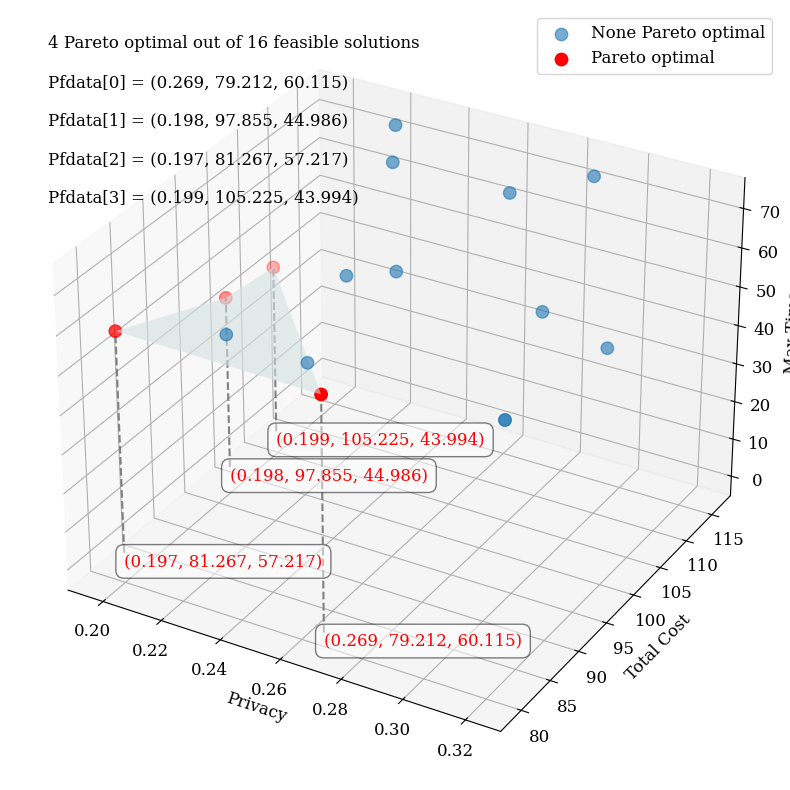

In [55]:
# 1WSI
budget = 120
strategies = 'Pareto1WSI_allcombined_'
strategies1WSI = graph_strategies + even_strategies

privacyscores1WSI = {}
privacyscores1WSI.update(graph_privacyscores)
privacyscores1WSI.update(even_privacyscores)

solutions1WSI = {}
solutions1WSI.update(graph_solutions_120)   # budget
solutions1WSI.update(even_solution_120)     # budget


print(len(solutions1WSI.values()))

input1 = [round(privacyscores1WSI[s][0] + privacyscores1WSI[s][1], 3) for s in strategies1WSI]          # privacy risk
input2 = [round(solutions1WSI[s]['Total Cost'], 3) for s in solutions1WSI]  # cost
input3 = [round(solutions1WSI[s]['Max Time'], 3) for s in solutions1WSI]    # time
inputPoints = [[input1[j], input2[j], input3[j] ] for j in range(len(input2))]

# paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates, sMax=True) # find maximum
paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates, sMax=False) # find minimum
print("paretoPoints: \n", paretoPoints, )
print("dominatedPoints: \n", dominatedPoints)

dp = np.array(list(dominatedPoints))
pp = np.array(list(paretoPoints))
print(pp.shape, dp.shape, len(set(list(pp[:,0]))))


# fig = plt.figure(figsize=(10, 8))  # Adjust the size to fit your needs
axs = plt.axes(projection='3d')

print(pp[:,0])
xdata = pp[:,0]
ydata = pp[:,1]
zdata = pp[:,2]

if len(set(list(pp[:,0])))==1:
    # fig = plt.figure(layout="constrained")

    print("lala", paretoPoints)
    
    solution_size = len(list(xdata))

    for i in range(len(list(xdata[:6]))):
        axs.text2D(0.05, 0.9-0.05*i, f'Pfdata[{i}] = ({xdata[i]:.3f}, {ydata[i]:.3f}, {zdata[i]:.3f})', transform=axs.transAxes)
        axs.plot([xdata[i], xdata[i]], [ydata[i], ydata[i]], [0, zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        # axs.plot([0, xdata[i]], [ydata[i], ydata[i]], [zdata[i], zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        # axs.plot([xdata[i], xdata[i]], [0, ydata[i]], [zdata[i], zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        
        # Adding labels for each scatter point
        text = axs.text(xdata[i], ydata[i], 0, f'({xdata[i]}, {ydata[i]}, {zdata[i]})', color='red',                        
        bbox=dict(facecolor='white', alpha=0.5, boxstyle='round, pad=0.5'), ha='left', va='top',rotation=45)
     

else:
    print(pp)

    if len(dominatedPoints)>=1 and len(paretoPoints)>=2: 
        axs.scatter(dp[:,0],dp[:,1],dp[:,2], label='None Pareto optimal', alpha = 0.6, s=80)
        axs.scatter(pp[:,0],pp[:,1],pp[:,2], color='red',s=80, label="Pareto optimal")
        triang = mtri.Triangulation(pp[:,0], pp[:,1])
        axs.plot_trisurf(triang,pp[:,2], color='azure', alpha = 0.6)
    elif len(paretoPoints)<=2 or len(dominatedPoints)<=2: 
        axs.scatter(dp[:,0],dp[:,1],dp[:,2], label='None Pareto optimal', alpha = 0.6, s=80, color='blue')
        axs.scatter(pp[:,0],pp[:,1],pp[:,2], color='red', s=80, label="Pareto optimal")
    elif len(paretoPoints)>=2 and len(dominatedPoints)<=2:
        axs.scatter(dp[:,0],dp[:,1],dp[:,2], label='None Pareto optimal', alpha = 0.6, s=80, color='blue')
        axs.scatter(pp[:,0],pp[:,1],pp[:,2], color='red', s=80, label="Pareto optimal")
        triang = mtri.Triangulation(pp[:,0], pp[:,1])
        axs.plot_trisurf(triang,pp[:,2], color='azure', alpha = 0.6)
    else: 

        axs.scatter(dp[:,0],dp[:,1],dp[:,2], label='None Pareto optimal', alpha = 0.6, color='blue')
        axs.scatter(pp[:,0],pp[:,1],pp[:,2], color='red', s=80, label="Pareto optimal")
        
    solution_size = len(list(xdata))
    axs.text2D(0.05, 0.95, f"{solution_size} Pareto optimal out of {len(input2)} feasible solutions", transform=axs.transAxes)
    
    for i in range(len(list(xdata[:6]))):
        axs.text2D(0.05, 0.9-0.05*i, f'Pfdata[{i}] = ({xdata[i]:.3f}, {ydata[i]:.3f}, {zdata[i]:.3f})', transform=axs.transAxes)
        axs.plot([xdata[i], xdata[i]], [ydata[i], ydata[i]], [0, zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        # axs.plot([0, xdata[i]], [ydata[i], ydata[i]], [zdata[i], zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        # axs.plot([xdata[i], xdata[i]], [0, ydata[i]], [zdata[i], zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        
        # Adding labels for each scatter point
        # text = axs.text(xdata[i], ydata[i], zdata[i], f'({xdata[i]}, {ydata[i]}, {zdata[i]})', color='red',
        text = axs.text(xdata[i], ydata[i], 0, f'({xdata[i]}, {ydata[i]}, {zdata[i]})', color='red',                        
        bbox=dict(facecolor='white', alpha=0.5, boxstyle='round, pad=0.5'), ha='left', va='top',rotation=45)
     
# plt.clf()
# axs.set_title("Pareto frontier 3D")
axs.set_xlabel(r'Privacy')
axs.set_ylabel(r'Total Cost')
axs.set_zlabel(r'Max Time')

axs.grid(True)
axs.legend()

plt.savefig(f"./Pareto_res/{strategies+str(budget)}"+".pdf")
plt.show()

## Pareto Optimal Resource Planning 
* Only even strategies

8
paretoPoints: 
 {(0.26, 99.057, 57.398), (0.238, 82.547, 84.561), (0.259, 81.486, 62.865), (0.238, 91.731, 72.474)}
dominatedPoints: 
 {(0.287, 91.731, 72.474), (0.287, 82.547, 84.561), (0.322, 99.057, 57.398), (0.322, 81.486, 62.865)}
(4, 3) (4, 3) 3
[0.26  0.238 0.259 0.238]
[[ 0.26  99.057 57.398]
 [ 0.238 82.547 84.561]
 [ 0.259 81.486 62.865]
 [ 0.238 91.731 72.474]]


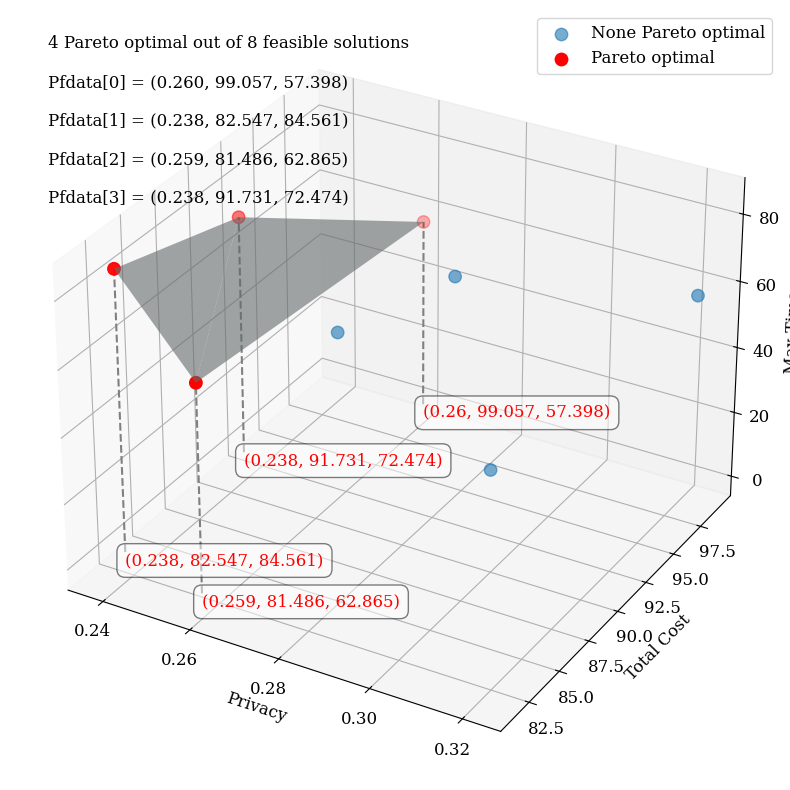

In [35]:
# 1WSI
budget = 100
strategies = 'Pareto1WSI_onlyeven_'
strategies1WSI = even_strategies

privacyscores1WSI = {}
privacyscores1WSI.update(even_privacyscores)

solutions1WSI = {}

solutions1WSI.update(even_solution_100) # budget


print(len(solutions1WSI.values()))

input1 = [round(privacyscores1WSI[s][0] + privacyscores1WSI[s][1], 3) for s in strategies1WSI]          # privacy risk
input2 = [round(solutions1WSI[s]['Total Cost'], 3) for s in solutions1WSI]  # cost
input3 = [round(solutions1WSI[s]['Max Time'], 3) for s in solutions1WSI]    # time
inputPoints = [[input1[j], input2[j], input3[j] ] for j in range(len(input2))]

# paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates, sMax=True) # find maximum
paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates, sMax=False) # find minimum
print("paretoPoints: \n", paretoPoints, )
print("dominatedPoints: \n", dominatedPoints)

dp = np.array(list(dominatedPoints))
pp = np.array(list(paretoPoints))
print(pp.shape, dp.shape, len(set(list(pp[:,0]))))


# fig = plt.figure(figsize=(10, 8))  # Adjust the size to fit your needs
axs = plt.axes(projection='3d')

print(pp[:,0])
xdata = pp[:,0]
ydata = pp[:,1]
zdata = pp[:,2]

if len(set(list(pp[:,0])))==1:
    # fig = plt.figure(layout="constrained")

    print("lala", paretoPoints)
    
    solution_size = len(list(xdata))

    for i in range(len(list(xdata[:6]))):
        axs.text2D(0.05, 0.9-0.05*i, f'Pfdata[{i}] = ({xdata[i]:.3f}, {ydata[i]:.3f}, {zdata[i]:.3f})', transform=axs.transAxes)
        axs.plot([xdata[i], xdata[i]], [ydata[i], ydata[i]], [0, zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        # axs.plot([0, xdata[i]], [ydata[i], ydata[i]], [zdata[i], zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        # axs.plot([xdata[i], xdata[i]], [0, ydata[i]], [zdata[i], zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        
        # Adding labels for each scatter point
        text = axs.text(xdata[i], ydata[i], 0, f'({xdata[i]}, {ydata[i]}, {zdata[i]})', color='red',                        
        bbox=dict(facecolor='white', alpha=0.5, boxstyle='round, pad=0.5'), ha='left', va='top',rotation=45)
     

else:
    print(pp)

    if len(dominatedPoints)>=1 and len(paretoPoints)>=2: 
        axs.scatter(dp[:,0],dp[:,1],dp[:,2], label='None Pareto optimal', alpha = 0.6, s=80)
        axs.scatter(pp[:,0],pp[:,1],pp[:,2], color='red',s=80, label="Pareto optimal")
        triang = mtri.Triangulation(pp[:,0], pp[:,1])
        axs.plot_trisurf(triang,pp[:,2], color='azure', alpha = 0.6)
    elif len(paretoPoints)<=2 or len(dominatedPoints)<=2: 
        axs.scatter(dp[:,0],dp[:,1],dp[:,2], label='None Pareto optimal', alpha = 0.6, s=80, color='blue')
        axs.scatter(pp[:,0],pp[:,1],pp[:,2], color='red', s=80, label="Pareto optimal")
    elif len(paretoPoints)>=2 and len(dominatedPoints)<=2:
        axs.scatter(dp[:,0],dp[:,1],dp[:,2], label='None Pareto optimal', alpha = 0.6, s=80, color='blue')
        axs.scatter(pp[:,0],pp[:,1],pp[:,2], color='red', s=80, label="Pareto optimal")
        triang = mtri.Triangulation(pp[:,0], pp[:,1])
        axs.plot_trisurf(triang,pp[:,2], color='azure', alpha = 0.6)
    else: 

        axs.scatter(dp[:,0],dp[:,1],dp[:,2], label='None Pareto optimal', alpha = 0.6, color='blue')
        axs.scatter(pp[:,0],pp[:,1],pp[:,2], color='red', s=80, label="Pareto optimal")
        
    solution_size = len(list(xdata))
    axs.text2D(0.05, 0.95, f"{solution_size} Pareto optimal out of {len(input2)} feasible solutions", transform=axs.transAxes)
    
    for i in range(len(list(xdata[:6]))):
        axs.text2D(0.05, 0.9-0.05*i, f'Pfdata[{i}] = ({xdata[i]:.3f}, {ydata[i]:.3f}, {zdata[i]:.3f})', transform=axs.transAxes)
        axs.plot([xdata[i], xdata[i]], [ydata[i], ydata[i]], [0, zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        # axs.plot([0, xdata[i]], [ydata[i], ydata[i]], [zdata[i], zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        # axs.plot([xdata[i], xdata[i]], [0, ydata[i]], [zdata[i], zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        
        # Adding labels for each scatter point
        text = axs.text(xdata[i], ydata[i], 0, f'({xdata[i]}, {ydata[i]}, {zdata[i]})', color='red',                        
        bbox=dict(facecolor='white', alpha=0.5, boxstyle='round, pad=0.5'), ha='left', va='top',rotation=45)
     
# plt.clf()
# axs.set_title("Pareto frontier 3D")
axs.set_xlabel(r'Privacy')
axs.set_ylabel(r'Total Cost')
axs.set_zlabel(r'Max Time')
axs.grid(True)
axs.legend()

plt.savefig(f"./Pareto_res/{strategies+str(budget)}"+".pdf")


plt.show()

## Pareto Optimal Resource Planning
* Only graph strategies

6
paretoPoints: 
 {(0.199, 96.797, 43.649), (0.197, 82.306, 57.403), (0.225, 79.922, 59.86), (0.198, 97.387, 45.208)}
dominatedPoints: 
 {(0.322, 81.463, 62.802), (0.268, 80.247, 60.542)}
(4, 3) (2, 3) 4
[0.199 0.197 0.225 0.198]
[[ 0.199 96.797 43.649]
 [ 0.197 82.306 57.403]
 [ 0.225 79.922 59.86 ]
 [ 0.198 97.387 45.208]]


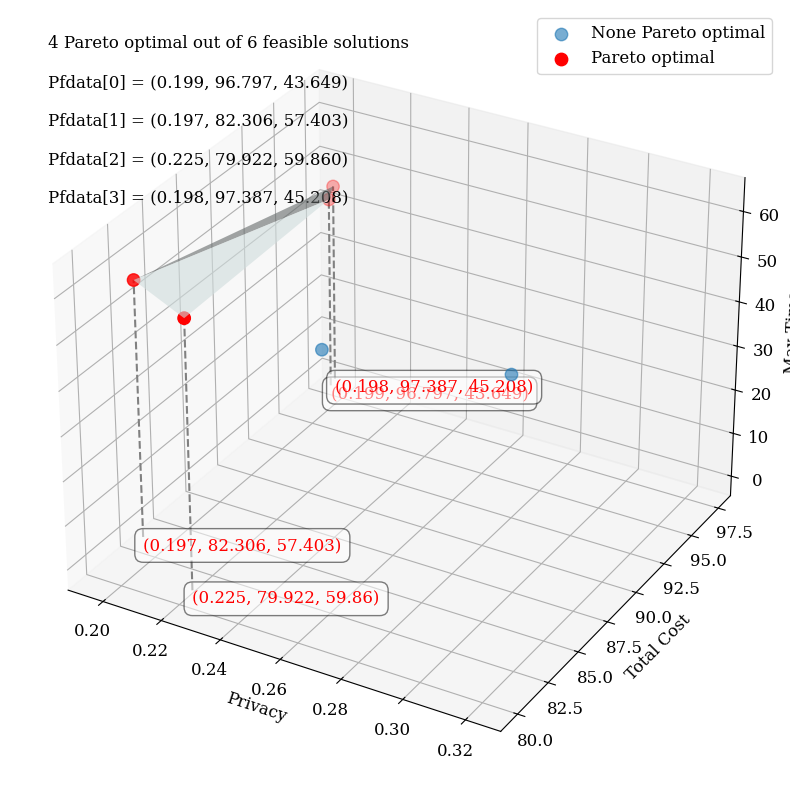

In [39]:
# 1WSI
budget = 100
strategies = 'Pareto1WSI_onlygraph_'
strategies1WSI = graph_strategies

privacyscores1WSI = {}
privacyscores1WSI.update(graph_privacyscores)
# privacyscores1WSI.update(even_privacyscores)

solutions1WSI = {}
solutions1WSI.update(graph_solutions_100)   # budget


print(len(solutions1WSI.values()))

input1 = [round(privacyscores1WSI[s][0] + privacyscores1WSI[s][1], 3) for s in strategies1WSI]          # privacy risk
input2 = [round(solutions1WSI[s]['Total Cost'], 3) for s in solutions1WSI]  # cost
input3 = [round(solutions1WSI[s]['Max Time'], 3) for s in solutions1WSI]    # time
inputPoints = [[input1[j], input2[j], input3[j] ] for j in range(len(input2))]

# paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates, sMax=True) # find maximum
paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates, sMax=False) # find minimum
print("paretoPoints: \n", paretoPoints, )
print("dominatedPoints: \n", dominatedPoints)

dp = np.array(list(dominatedPoints))
pp = np.array(list(paretoPoints))
print(pp.shape, dp.shape, len(set(list(pp[:,0]))))


# fig = plt.figure(figsize=(10, 8))  # Adjust the size to fit your needs
axs = plt.axes(projection='3d')

print(pp[:,0])
xdata = pp[:,0]
ydata = pp[:,1]
zdata = pp[:,2]

if len(set(list(pp[:,0])))==1:
    # fig = plt.figure(layout="constrained")

    print("lala", paretoPoints)
    
    solution_size = len(list(xdata))

    for i in range(len(list(xdata[:6]))):
        axs.text2D(0.05, 0.9-0.05*i, f'Pfdata[{i}] = ({xdata[i]:.3f}, {ydata[i]:.3f}, {zdata[i]:.3f})', transform=axs.transAxes)
        axs.plot([xdata[i], xdata[i]], [ydata[i], ydata[i]], [0, zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        # axs.plot([0, xdata[i]], [ydata[i], ydata[i]], [zdata[i], zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        # axs.plot([xdata[i], xdata[i]], [0, ydata[i]], [zdata[i], zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        
        # Adding labels for each scatter point
        text = axs.text(xdata[i], ydata[i], 0, f'({xdata[i]}, {ydata[i]}, {zdata[i]})', color='red',
        bbox=dict(facecolor='white', alpha=0.5, boxstyle='round, pad=0.5'), ha='left', va='top',rotation=45)
     

else:
    print(pp)

    if len(dominatedPoints)>=1 and len(paretoPoints)>=2: 
        axs.scatter(dp[:,0],dp[:,1],dp[:,2], label='None Pareto optimal', alpha = 0.6, s=80)
        axs.scatter(pp[:,0],pp[:,1],pp[:,2], color='red',s=80, label="Pareto optimal")
        triang = mtri.Triangulation(pp[:,0], pp[:,1])
        axs.plot_trisurf(triang,pp[:,2], color='azure', alpha = 0.6)
    elif len(paretoPoints)<=2 or len(dominatedPoints)<=2: 
        axs.scatter(dp[:,0],dp[:,1],dp[:,2], label='None Pareto optimal', alpha = 0.6, s=80, color='blue')
        axs.scatter(pp[:,0],pp[:,1],pp[:,2], color='red', s=80, label="Pareto optimal")
    elif len(paretoPoints)>=2 and len(dominatedPoints)<=2:
        axs.scatter(dp[:,0],dp[:,1],dp[:,2], label='None Pareto optimal', alpha = 0.6, s=80, color='blue')
        axs.scatter(pp[:,0],pp[:,1],pp[:,2], color='red', s=80, label="Pareto optimal")
        triang = mtri.Triangulation(pp[:,0], pp[:,1])
        axs.plot_trisurf(triang,pp[:,2], color='azure', alpha = 0.6)
    else: 

        axs.scatter(dp[:,0],dp[:,1],dp[:,2], label='None Pareto optimal', alpha = 0.6, color='blue')
        axs.scatter(pp[:,0],pp[:,1],pp[:,2], color='red', s=80, label="Pareto optimal")
        
    solution_size = len(list(xdata))
    axs.text2D(0.05, 0.95, f"{solution_size} Pareto optimal out of {len(input2)} feasible solutions", transform=axs.transAxes)
    
    for i in range(len(list(xdata[:6]))):
        axs.text2D(0.05, 0.9-0.05*i, f'Pfdata[{i}] = ({xdata[i]:.3f}, {ydata[i]:.3f}, {zdata[i]:.3f})', transform=axs.transAxes)
        axs.plot([xdata[i], xdata[i]], [ydata[i], ydata[i]], [0, zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        # axs.plot([0, xdata[i]], [ydata[i], ydata[i]], [zdata[i], zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        # axs.plot([xdata[i], xdata[i]], [0, ydata[i]], [zdata[i], zdata[i]], color='gray', linestyle='--')  # Vertical line from z=0 to z=zi_top
        
        # Adding labels for each scatter point
        text = axs.text(xdata[i], ydata[i], 0, f'({xdata[i]}, {ydata[i]}, {zdata[i]})', color='red',
        bbox=dict(facecolor='white', alpha=0.5, boxstyle='round, pad=0.5'), ha='left', va='top',rotation=40)
     
# plt.clf()
# axs.set_title("Pareto frontier 3D")
axs.set_xlabel(r'Privacy')
axs.set_ylabel(r'Total Cost')
axs.set_zlabel(r'Max Time')
axs.grid(True)
axs.legend()
plt.savefig(f"./Pareto_res/{strategies+str(budget)}"+".pdf")


plt.show()